In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import Image
from IPython.core.display import HTML 

# Principal components analysis

## What is it?

PCA is a **dimensionality reduction** algorithm to reduce the dimensionality of a dataset, while **preserving as much variability as possible** by **transforming the original variables** into a new set of new variables that are **linear functions** of the original ones. These new variables are the **principal components** and are linearly uncorrelated to each other.

In [3]:
Image(url= "https://i.stack.imgur.com/Q7HIP.gif", width = 800)

## Why do we want to use it?

### Dimensionality reduction

- Performance
- To make some algorithms possible (e.g. some types of clustering)
- Helps you to understand how much information there is in the data
- Data Visualization (it's difficult to visualize more than 2 (3?) dimensions)
    - Exploratory analysis (e.g. explore bias --> show examples)
    - Explanatory (difficult but sometimes useful)

## Which concepts do we need to understand it?

[Depends as this excelent answer states:](https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues) _Imagine a big family dinner, where everybody starts asking you about PCA. First you explain it to your great-grandmother; then to you grandmother; then to your mother; then to your spouse; finally, to your daughter (who is a mathematician). Each time the next person is less of a layman. Here is how the conversation might go_.

### --> Basic understanding 
(enough for stakeholders, to test it and apply it, to talk to 90% of colleagues)

- PCA aims to **reduce the dimensions** (number of features) of your data set trying to preserve as much variance as possible by **choosing a new set of the “most informative” dimensions**
- The new variables, the principal components, are **linear combinations** of the original variables.
- With these principal compenents we map our data into a **new feature space**



- The principal components are sorted: the first one explains the most variance, and so on
- We decide how many components to preserve depending on the amount of variance we want to retain

### --> Good understanding 
(this is what you should aim at if using PCA regularly) 

[Here is an excelent article with the right level](https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c)

#### **Know** that calculating PCA involves following steps:
- Calculating the **covariance matrix**: a measure of how variables are associated with each other. :)
- Calculating the **eigenvectors**(directions in which our data are dispersed) and corresponding **eigenvalues** (the relative importance of these different directions) of the covariance matrix :)
- Projection into the **new feature space** formed by the principal components :)


#### Visually* **understand**: 
- Transformation to the new coordinates
- Maximizing (co-) variance
- Eigenvectors and values. ([Here are nice representations of eigenvectors](https://pathmind.com/images/wiki/two_spaces.png)) 
- This link will help: https://setosa.io/ev/principal-component-analysis/
    
#### Be able to **intepret**: 
- Proportion of variation explained by each principal component
- Biplot
    
_*Visual understansing means you can sketch the concepts to explain them even if you don't know the equations_

### --> Complete understanding 

To understand it completely, I advise you to implement it from scratch: best way to understand the math. Example step by step here: https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/

## Let's try it out on our favourite data set! 
Adapted from [here](https://cmdlinetips.com/2020/06/principal-component-analysis-with-penguins-data-in-python/).

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
#df = pd.read_csv('../week_01/all_penguins_clean.csv', index_col=0)
df = pd.read_csv('all_penguins_clean.csv')
df.dropna(inplace=True)

In [30]:
columns_of_interest = ['Species', "Culmen Length (mm)", "Culmen Depth (mm)", 
                       "Flipper Length (mm)", "Body Mass (g)", "Sex"]
df = df[columns_of_interest]

In [31]:
# Separate df into features with numerical descriptions and categories
penguins_data = df.select_dtypes(np.number) #<- in pandas you can select columns by type
penguins_info = df.select_dtypes(exclude='float')

In [32]:
penguins_data = df.select_dtypes(np.number) #<- in pandas you can select columns by type


In [35]:
penguins_data

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
338,47.2,13.7,214.0,4925.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


#### It is VERY IMPORTANT to scale your input features for the PCA, so that the algorith doesn't think one variable is more important just because its units are bigger.

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(penguins_data)

In [37]:
penguins_data.head()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


## Here we start with the actual PCA

In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 4) #, how many components to return after the transformation, default = all
penguins_pca = pca.fit_transform(X)

In [46]:
penguins_pca.shape

(334, 4)

In [40]:
# Percentage of explained variance by component, the sum is 100% or 1
pca.explained_variance_ratio_

array([0.68641678, 0.19448404, 0.09215558, 0.02694359])

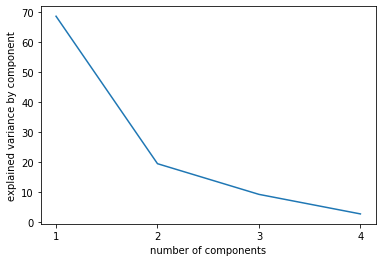

In [41]:
plt.plot(pca.explained_variance_ratio_*100)
plt.xlabel('number of components')
plt.ylabel('explained variance by component')
plt.xticks(np.arange(4), np.arange(1,5)) 
plt.show()

#PCA1 is at 0 in xscale

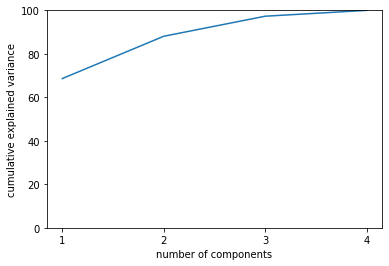

In [44]:
plt.plot(np.cumsum(pca.explained_variance_ratio_*100))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.xticks(np.arange(4), np.arange(1,5)) 
plt.ylim(0,100)
plt.show()
#PCA1 is at 0 in xscale

In [47]:
# Create df with PCs from scaled data and add the Penguin infomation to visualize it.
pca_df = pd.DataFrame(data = penguins_pca , 
        columns = ['PC1', 'PC2','PC3', 'PC4'])
pca_df['Species'] = df['Species']
pca_df['Sex'] = df['Sex']
pca_df.head()

,PC1,PC2,PC3,PC4,Species,Sex
0,-1.858488,0.031676,-0.234510,0.528668,Adelie,MALE
1,-1.320722,-0.443473,-0.025823,0.402273,Adelie,FEMALE
2,-1.381688,-0.161086,0.189986,-0.528493,Adelie,FEMALE
3,-1.890897,-0.014556,-0.629799,-0.472072,NaN,NaN
4,-1.925839,0.816179,-0.703351,-0.196043,Adelie,FEMALE


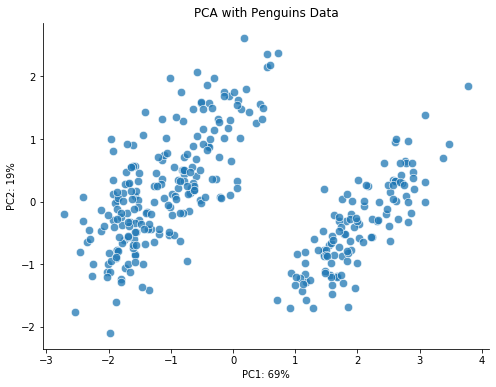

In [48]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="PC1", y="PC2", 
                data=pca_df, 
                s = 70, 
                alpha= 0.75)
plt.xlabel("PC1: "+f'{pca.explained_variance_ratio_[0]*100:.0f}'+"%")
plt.ylabel("PC2: "+f'{pca.explained_variance_ratio_[1]*100:.0f}'+"%")
plt.title("PCA with Penguins Data")
sns.despine()

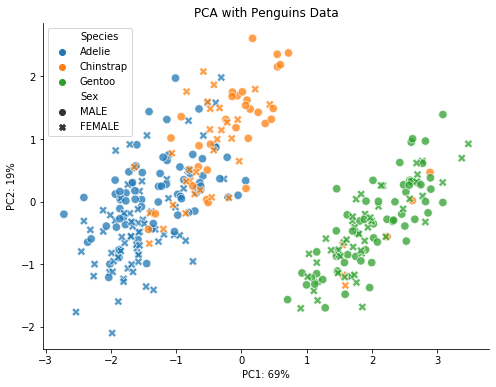

In [49]:
# Adding info
plt.figure(figsize=(8,6))
sns.scatterplot(x="PC1", y="PC2", 
                data=pca_df, 
                hue="Species",
                style="Sex", 
                s = 70, 
                alpha= 0.75)
plt.xlabel("PC1: "+f'{pca.explained_variance_ratio_[0]*100:.0f}'+"%")
plt.ylabel("PC2: "+f'{pca.explained_variance_ratio_[1]*100:.0f}'+"%")
plt.title("PCA with Penguins Data")
sns.despine()

#### Biplot
- No inherent biplot function in scikit PCA, but plenty of implementations out there, like this one: https://stackoverflow.com/questions/39216897/plot-pca-loadings-and-loading-in-biplot-in-sklearn-like-rs-autoplot

- Another options is the pca package (!pip install pca)

In [50]:
def biplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = 'b', alpha = 0.5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'k', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

Text(0.5, 1.0, 'Biplot of PCA with Penguins Data')

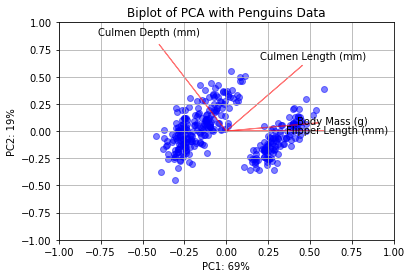

In [51]:
#Call the function with the first two PC
biplot(penguins_pca[:,0:2],np.transpose(pca.components_[0:2, :]), labels = penguins_data.columns)
plt.xlabel("PC1: "+f'{pca.explained_variance_ratio_[0]*100:.0f}'+"%")
plt.ylabel("PC2: "+f'{pca.explained_variance_ratio_[1]*100:.0f}'+"%")
plt.title("Biplot of PCA with Penguins Data")

## Example of use with your bicycle data set

In [71]:
# change the path to the location of your file
df = pd.read_csv("../data_sets/bike-sharing-demand/train.csv") 

In [72]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.weekday
df['month'] = df['datetime'].dt.month

In [73]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,5,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,5,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,5,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,5,1


In [74]:
y = df['count']
X = df.drop(['count', 'casual','registered', 'datetime'], axis = 1)

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

### Apply de PCA

In [76]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [77]:
pca = PCA()
pca_X_train = pca.fit_transform(X_train)

In [78]:
pca.explained_variance_ratio_

array([0.23190565, 0.16883794, 0.15610353, 0.1126274 , 0.10123401,
       0.09430201, 0.07524542, 0.04009931, 0.01593893, 0.002527  ,
       0.00117879])

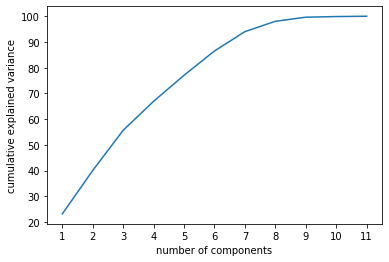

In [79]:
plt.plot(np.cumsum(pca.explained_variance_ratio_*100))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.xticks(np.arange(len(pca.explained_variance_ratio_)), np.arange(1,len(pca.explained_variance_ratio_)+1)) 
plt.show()

In [80]:
## The rest is for you to try..

In [81]:
# Important, later for your test data you would transform it, but not fit it anymore. Why?
X_test = scaler.transform(X_test)
X_test = pca.transform(X_test)